In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier(9)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

np.float64(0.9833333333333334)

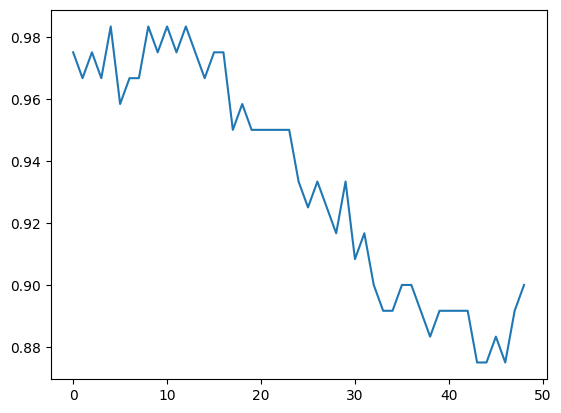

In [18]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [19]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    param_name='n_neighbors',
    param_range=k,
    cv=5,
    scoring='accuracy'
)



In [20]:
train_score.shape

(49, 5)

In [21]:
val_score.shape

(49, 5)

In [22]:
val_score

array([[1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.

In [ ]:
val_score.mean(axis=1)

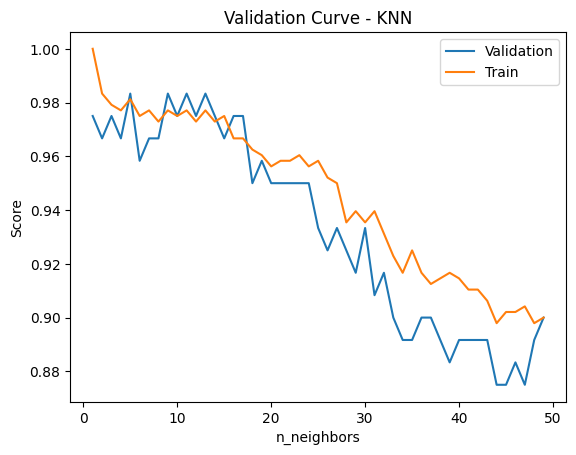

In [25]:
train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)

plt.plot(k, val_mean, label='Validation')
plt.plot(k, train_mean, label='Train')

plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.title('Validation Curve - KNN')
plt.legend()
plt.grid(False)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [27]:
print(grid.best_score_)

0.9833333333333334


In [28]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': np.int64(5)}


In [29]:
model=grid.best_estimator_

In [30]:
model.score(X_test,y_test)

0.9333333333333333

In [31]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [34]:
from  sklearn.model_selection import learning_curve

In [36]:
N,train_score,val_score = learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)

In [37]:
print(N)

[ 9 19 28 38 48 57 67 76 86 96]


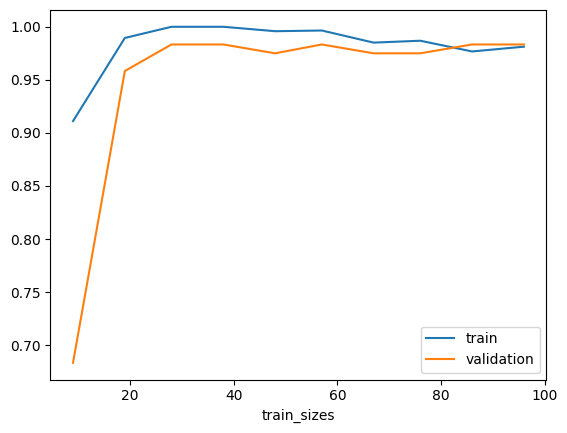

In [38]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()